In [1]:
# Adrian Marinovich
# Springboard - Data Science Career Track 
# Capston Project #1 - Smiles dataset #2
# Data wrangling

In [1]:
# Given the size of the datasets (45MB for grayscale, 145MB for 3-color), and
#  anticipating I may import additional data to further pursue facial expression
#  analysis, I decided to store data on the Amazon Web Services (AWS) S3 bucket,
#  and to use an instance of AWS Deep Learning AMI (Amazon Machine Image), which
#  allows scaling to higher performance processors as needed.
#
#  Here, among other packages, I import Boto (boto3), the AWS SDK for Python, 
#   then use Boto tools to pull the data from the SWA S3 bucket into this 
#   Jupyter notebook, which is running on an AWS EC2 instance.

import boto3
import cv2
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
import random
import re
import shutil

#Enter keys:
s3 = boto3.resource('s3',
                    aws_access_key_id='',
                    aws_secret_access_key='')
client = boto3.client('s3',
                      aws_access_key_id='',
                      aws_secret_access_key='')
resource = boto3.resource('s3',
                          aws_access_key_id='',
                          aws_secret_access_key='')

# The S3 buckets already created, hold:
#   All 13233 LFWcrop images in adriatic13s1, obtained from:
#       http://conradsanderson.id.au/lfwcrop/
#   The smile and non-smile lists for the small smiles dataset 
#     in adriatic13s2, obtained from:
#       https://data.mendeley.com/datasets/yz4v8tb3tp/5
#   The larger LFWcrop images classified into smile and non-smile, 
#     and further classified for this capstone project, originally obtained from:
#       https://github.com/hromi/SMILEsmileD/tree/master/SMILEs
#     and divided in to adriatic13s3 (nonsmile) and adriatic13s4 (smile)

#### Note that the following commands must be run in a local terminal (linux, with AWS CLI already installed) in order to create and fill the S3 buckets described in part above.

#### In AWS, create new IAM user in new group:<br>
adrian_group_2<br>
adrian_iam_2<br>
Access key ID:<br>
Secret access key:<br>

#### Must manually add this user to config file in /home/.aws:

[default]<br>
region = us-east-1b<br>
output = json

[adrian_iam_1]<br>
region = us-east-1b<br>
output = json

[adrian_iam_2]<br>
region = us-east-1b<br>
output = json

#### ...and add to credentials file in /home/.aws:

[default]<br>
aws_access_key_id = <br>
aws_secret_access_key = 

[adrian_iam_1]<br>
aws_access_key_id =<br> 
aws_secret_access_key = 

[adrian_iam_2]<br>
aws_access_key_id =<br> 
aws_secret_access_key = 

#### Run in local terminal:

##### To see current buckets:<br>
~/.local/bin/aws s3 ls --profile adrian_iam_2

##### To make buckets for second dataset:<br>
~/.local/bin/aws s3 mb s3://adriatic13s3 --profile adrian_iam_2<br>
~/.local/bin/aws s3 mb s3://adriatic13s4 --profile adrian_iam_2<br>

##### Copy negative (non-smile) files into adriatic13s3 bucket:<br>
~/.local/bin/aws s3 cp "/home/adrian/adrian/awork/ds/cvision/smiles/SmileD/SMILEs_edit/neg7added" s3://adriatic13s3 --recursive --profile adrian_iam_2

##### Copy positive (smile) files into adriatic13s4 bucket:<br>
~/.local/bin/aws s3 cp "/home/adrian/adrian/awork/ds/cvision/smiles/SmileD/SMILEs_edit/pos7added" s3://adriatic13s4 --recursive --profile adrian_iam_2

In [2]:
# View the S3 buckets
for bucket in s3.buckets.all():
    print(bucket.name)

adriatic13
adriatic13s1
adriatic13s2
adriatic13s3
adriatic13s4


In [3]:
# Access, count and view named files in non-smile images bucket,
#  and print first and last image file names and count numbers
#  Note: first count goes to directory
count=0
for obj in s3.Bucket(name='adriatic13s3').objects.all():
    count+=1
    if count==2:
        print('Non-smiles:\n', os.path.join(obj.bucket_name, obj.key), count-1)
print(' ', os.path.join(obj.bucket_name, obj.key), count-1) 

Non-smiles:
 adriatic13s3/10.jpg 1
  adriatic13s3/9999.jpg 9199


In [4]:
# Access, count and view named files in smile images bucket,
#  and print first and last image file names and count numbers
#  Note: first count goes to directory
count=0
for obj in s3.Bucket(name='adriatic13s4').objects.all():
    count+=1
    if count==2:
        print('Smiles:\n', os.path.join(obj.bucket_name, obj.key), count-1)
print(' ', os.path.join(obj.bucket_name, obj.key), count-1) 

Smiles:
 adriatic13s4/1000.jpg 1
  adriatic13s4/9998.jpg 3719


In [5]:
# Create non-smile local dataset

os.makedirs('smile_d/', exist_ok=True)

bucket1 = resource.Bucket('adriatic13s3')

objs3 = [os.path.join(obj.key) 
         for obj in s3.Bucket(name='adriatic13s3').objects.all()]
    
count = 0
for obj in objs3:
    if obj[-4:]=='.jpg':
        count+=1
        bucket1.download_file(obj, 'smile_d/nsmile%d' % count)
print('Total non-smile matches downloaded:', count)

Total non-smile matches downloaded: 9199


In [6]:
# Create smile local dataset

os.makedirs('smile_d/', exist_ok=True)

bucket1 = resource.Bucket('adriatic13s4')

objs4 = [os.path.join(obj.key) 
         for obj in s3.Bucket(name='adriatic13s4').objects.all()]
    
count = 0
for obj in objs4:
    if obj[-4:]=='.jpg':
        count+=1
        bucket1.download_file(obj, 'smile_d/ysmile%d' % count)
print('Total smile matches downloaded:', count)

Total smile matches downloaded: 3719


AxesImage(54,36;334.8x217.44)


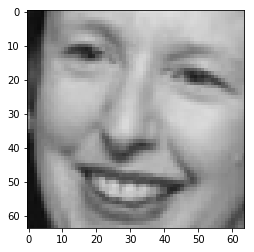

In [12]:
# View two images labelled smile and non-smile, 
#  and check pixel dimensions

imagePath1 = 'smile_d/ysmile107'
imagePath2 = 'smile_d/nsmile107'

imagey = cv2.imread(imagePath1)
imagen = cv2.imread(imagePath2)

print(plt.imshow(imagey))

AxesImage(54,36;334.8x217.44)


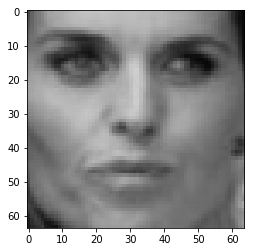

In [13]:
print(plt.imshow(imagen))

In [18]:
img = cv2.imread('smile_d/ysmile107')
img.shape

(64, 64, 3)

In [19]:
# Note that, even though these are grayscale images, they
#  have each pixel's intensity in triplicate, as 
#  confirmed here
px = img[25,25]
print(px)

[167 167 167]


In [20]:
# Here we confirm that reducing the dimension of the array
#  will retain the grayscale image dimensions...
px2 = img[:,:,0]
px2.shape

(64, 64)

AxesImage(54,36;334.8x217.44)


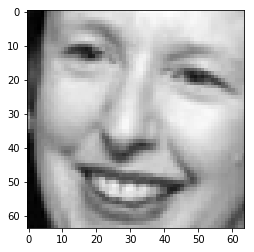

In [21]:
# ... and produce a grayscale image (noting that cmap='gray'
#      is needed to keep matplotlib from showing a colormap)
print(plt.imshow(px2, cmap='gray'))

In [22]:
# Make list of all filenames, then save as
#  permanent csv file in control folder
os.makedirs('smile_control/', exist_ok=True)

count=0
smileD_all=[]
for obj in glob.glob('smile_d/*smile*'):
    count+=1
    smileD_all.append(obj[8:])
print('total filenames read into list:', count)

count2=0
with open('smile_control/smileD_all.csv','w') as f:
    for line in smileD_all:
        count2+=1
        f.write(line)
        if count2<=(len(smileD_all)-1):
            f.write('\n')
    print('total filenames saved permanently:', count2)

del smileD_all

total filenames read into list: 12918
total filenames saved permanently: 12918


In [23]:
# Shuffle and split filenames list into permanent
#  training, validation, test/hold-out sets,
#  using 80%, 15%, 5% split respectively

# Pulling filenames back from permanent file
smileD_all = [line.rstrip('\n') for line in open('smile_control/smileD_all.csv')]

random.shuffle(smileD_all)

to80 = round(0.8*len(smileD_all))
f80to95 = to80 + round(0.15*len(smileD_all))

smileD_train = smileD_all[:to80]
smileD_valid = smileD_all[to80:f80to95]
smileD_hold = smileD_all[f80to95:]

count3=0
with open('smile_control/smileD_train.csv','w') as f:
    for line in          smileD_train:
        count3+=1
        f.write(line)
        if count3<=(len( smileD_train)-1):
            f.write('\n')
count3=0
with open('smile_control/smileD_valid.csv','w') as f:
    for line in          smileD_valid:
        count3+=1
        f.write(line)
        if count3<=(len( smileD_valid)-1):
            f.write('\n')
count3=0
with open('smile_control/smileD_hold.csv','w') as f:
    for line in          smileD_hold:
        count3+=1
        f.write(line)
        if count3<=(len( smileD_hold)-1):
            f.write('\n')

print('training:', len(smileD_train),
      '\nvalidation:', len(smileD_valid),
      '\ntest/hold-out:', len(smileD_hold),
      '\ntotal:', len(smileD_train) + len(smileD_valid) + len(smileD_hold))

del smileD_train, smileD_valid, smileD_hold

training: 10334 
validation: 1938 
test/hold-out: 646 
total: 12918
